<a href="https://colab.research.google.com/github/bit013/2309project/blob/master/ffcomments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb


In [3]:
#train_data[2]

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
  
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [6]:
x_train[2]


array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [ ]:
# train_data[2]

In [8]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
# word_index

In [9]:
revers_word_index = dict([(value, key)for (key,value) in word_index.items()])

In [ ]:
# revers_word_index

In [17]:
descoded_review = " ".join([revers_word_index.get(i-3, " ")for i in train_data[2]])

In [18]:
descoded_review

"  this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had   working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how   this is to watch save yourself an hour a bit of your life"

In [12]:
from keras import models
from keras import layers
model = models.Sequential() #создание модели
model.add(layers.Dense(16, activation = "relu", input_shape=(10000,)))#в модель добавляется 16 нейронов relu-преобразование что меньше 0 = 0 если больше 0 y=x в input_shape-количество слов
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid")) #переводит числа от нуля до единицы синус

In [13]:
asd = [1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99 ]

In [14]:
descoded_review = " ".join([revers_word_index.get(i-3, " ")for i in asd])

In [16]:
print(descoded_review)

  beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to   on and rate it so other would enjoy too


In [29]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])#компиляция модели по параметрам: оптимизатор, функция потерь, метрика,optimizer - метод достижения лучших результатов, потери - насколько она точно предугадала и регулируется оптимизатором, метрика показывает правильно расставленных метаклассов

In [30]:
x_val = x_train[10000:] #cохраняем первые 10к коментов и положительные или отриц  отзыв
y_val= y_train[10000:]
x_valid = x_train[:10000]
y_valid = y_train[:10000]

In [31]:
history = model.fit(x_val, 
                    y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid) 
                    ) #epoch - полный цикл модели, 512 - отзывов рандомных, valid-определение насколько успешно построена модель

Epoch 1/20
30/30 [==============================] - 5s 127ms/step - loss: 0.5154 - accuracy: 0.7782 - val_loss: 0.4255 - val_accuracy: 0.8310
Epoch 2/20
30/30 [==============================] - 2s 50ms/step - loss: 0.3059 - accuracy: 0.9015 - val_loss: 0.3002 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2243 - accuracy: 0.9257 - val_loss: 0.2777 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1759 - accuracy: 0.9427 - val_loss: 0.2871 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1427 - accuracy: 0.9558 - val_loss: 0.3263 - val_accuracy: 0.8734
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1191 - accuracy: 0.9633 - val_loss: 0.2937 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1001 - accuracy: 0.9700 - val_loss: 0.3144 - val_accuracy: 0.8849
Epoch 8/20
3

In [32]:
history_d = history.history
#название модели и переменная


In [ ]:
history_d.keys()

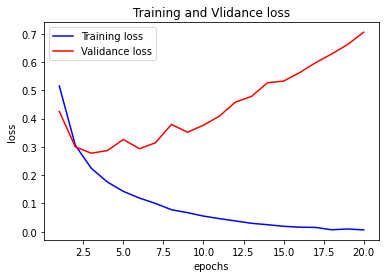

In [38]:
import matplotlib.pyplot as plt
loss_values = history_d["loss"]
val_loss_values = history_d["val_loss"]
epochs = range(1,len(history_d["accuracy"])+1)
plt.plot(epochs, loss_values, 'b', label="Training loss")
plt.plot(epochs, val_loss_values, 'r', label="Validance loss")
plt.title("Training and Vlidance loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()